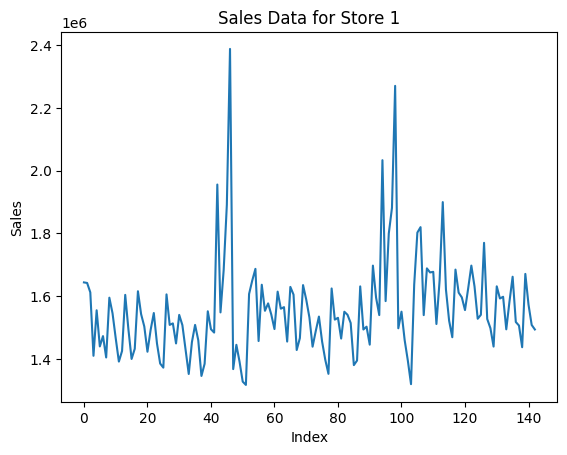

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Filter the data for store 1
store_1_data = df[df['Store'] == 1]
# Extract sales data
sales_data = store_1_data['Weekly_Sales']

# Plot the data
plt.plot(sales_data)
plt.title('Sales Data for Store 1')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()


In [3]:
# Need to check if data is stationary before fitting a model
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")

ADF Statistic: -5.102186
p-value: 0.000014
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
The series is likely stationary.


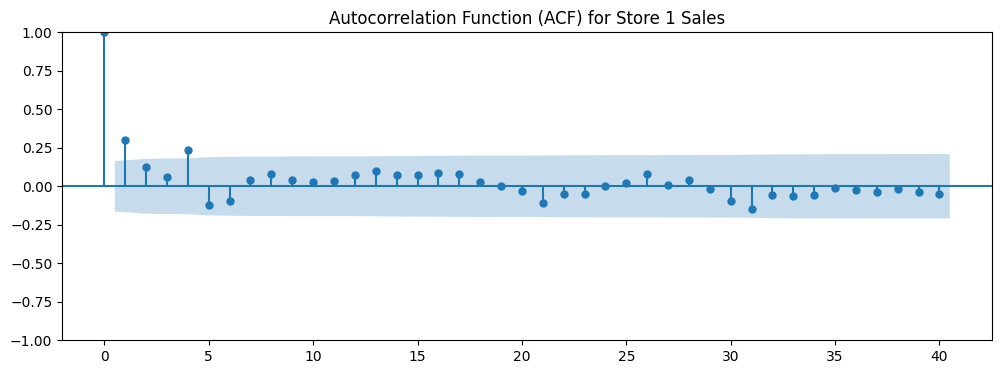

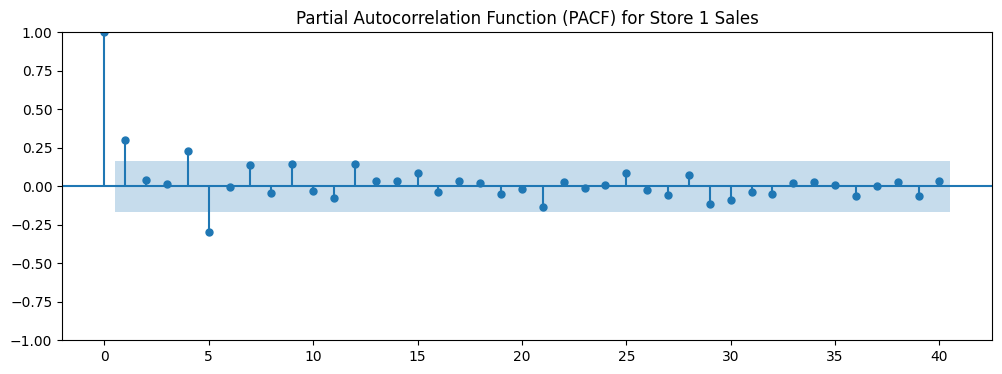

In [8]:
# Let's plot PACF and ACF too
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_acf(sales_data, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Store 1 Sales')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(sales_data, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Store 1 Sales')
plt.show()

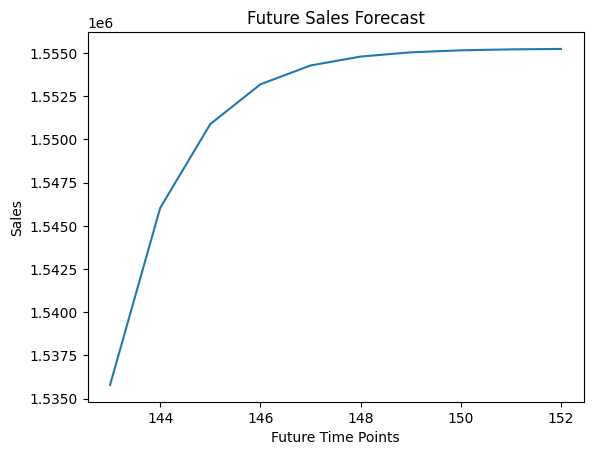

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales_data, order=(1, 0, 1))
fitted_model = model.fit()

# Forecast the next 10 values
forecast = fitted_model.forecast(steps=10)

# Plot the forecast
plt.plot(forecast)
plt.title('Future Sales Forecast')
plt.xlabel('Future Time Points')
plt.ylabel('Sales')
plt.show()

ARIMA predicts a threshold areound 1.55 * 10^6

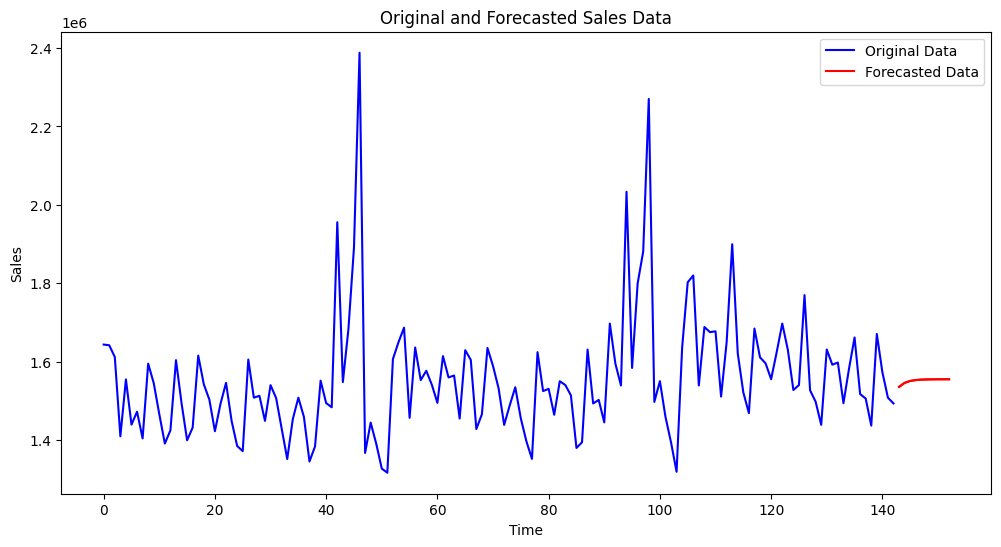

In [15]:
# Combine original and forecasted data for plotting
combined_data = pd.concat([sales_data, forecast])

# Plot the original data
plt.figure(figsize=(12,6))
plt.plot(sales_data, color='blue', label='Original Data')
plt.plot(combined_data.index[-10:], forecast, color='red', label='Forecasted Data')
plt.plot(combined_data.index[-10:], forecast, color='red') # Points for forecasted data
plt.legend()
plt.title('Original and Forecasted Sales Data')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

Compare this with forecasting using Facebook Prophet:


In [16]:
pip install prophet

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqla6ymn/l0g83uue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqla6ymn/2jrkr66w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/pyt

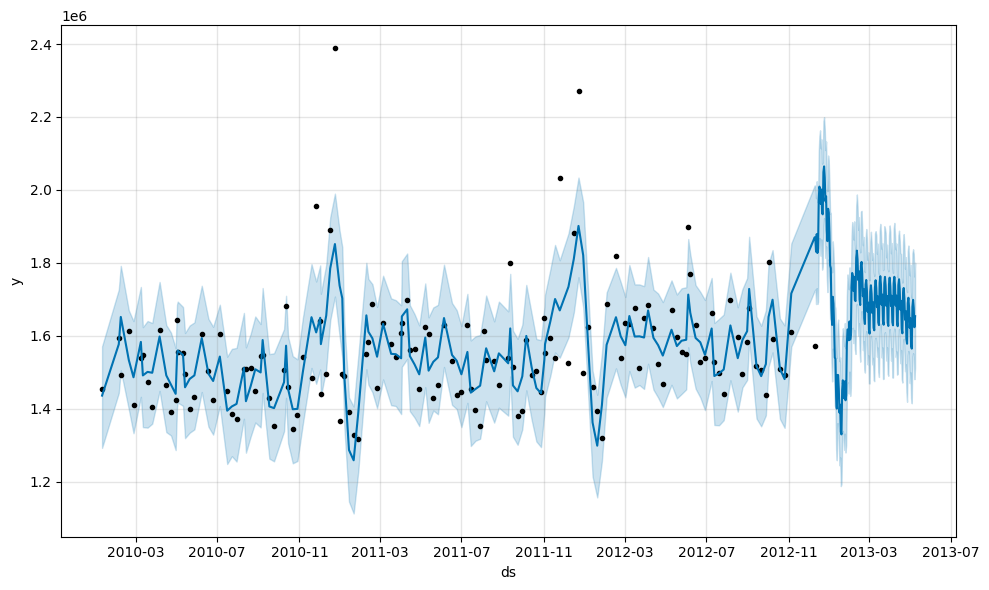

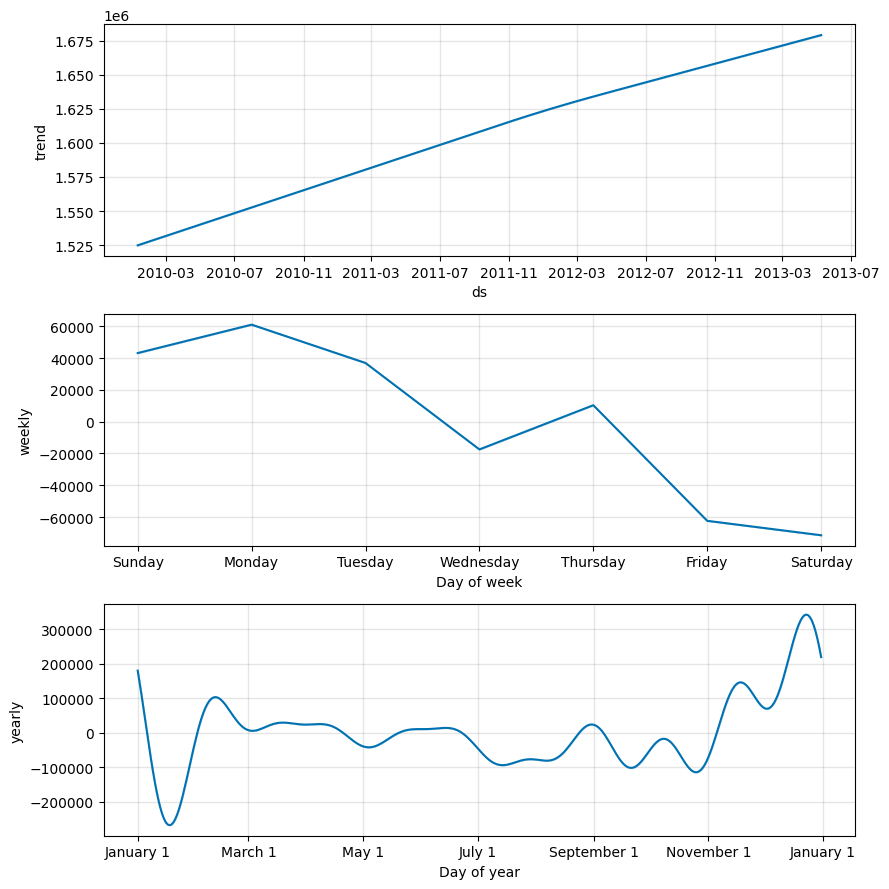

In [19]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
df = pd.read_csv('Walmart.csv')
df = df[df['Store'] == 1][['Date', 'Weekly_Sales']]
df.columns = ['ds', 'y']  # Rename the columns for Prophet

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=150)
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the components (trend, yearly seasonality, and weekly seasonality, if applicable)
fig2 = model.plot_components(forecast)
plt.show()



Much better!!!